<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-общей-информации-о-данных" data-toc-modified-id="Изучение-общей-информации-о-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение общей информации о данных</a></span></li><li><span><a href="#Подготовка-данных-для-обучения-модели" data-toc-modified-id="Подготовка-данных-для-обучения-модели-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных для обучения модели</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Обучение-модели-LinearRegression" data-toc-modified-id="Обучение-модели-LinearRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обучение модели <code>LinearRegression</code></a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Общий-вывод-по-исследованию" data-toc-modified-id="Общий-вывод-по-исследованию-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод по исследованию</a></span></li></ul></div>

# Выбор локации для скважины

Предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Нужно построить модель для определения региона, где добыча принесёт наибольшую прибыль.

---

**Цель исследования:** Построить модель машинного обучения, которая поможет определить регион, где добыча принесет наибольшую прибыль. Проанализировать возможную прибыль и риски техникой Bootstrap

**Контекст исследования:** Пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

**План исследования:**
1. *Загрузить и подготовить данные*


2. *Обучить и проверить модель для каждого региона:*
- Разбить данные на обучающую и валидационную выборки в соотношении 75:25.
- Обучить модель и сделать предсказания на валидационной выборке.
- Сохранить предсказания и правильные ответы на валидационной выборке.
- Напечатать на экране средний запас предсказанного сырья и RMSE модели.
- Проанализировать результаты.
3. *Подготовка к расчёту прибыли:*
- Все ключевые значения для расчётов сохранить в отдельных переменных.
- Рассчитать достаточный объём сырья для безубыточной разработки новой скважины. Сравнить полученный объём сырья со средним запасом в каждом регионе. 
- Написать выводы по этапу подготовки расчёта прибыли.
4. *Написать функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:*
- Выбрать скважины с максимальными значениями предсказаний. 
- Просуммировать целевое значение объёма сырья, соответствующее этим предсказаниям.
- Рассчитать прибыль для полученного объёма сырья.
5. *Посчитать риски и прибыль для каждого региона:*
- Применить технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
- Найти среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
- Написать выводы: предложить регион для разработки скважин и обоснуйте выбор.

**Шаги для выбора локации:**

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Условия задачи:**
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

**Описание данных:**

- *Признаки:*
    - `id` — уникальный идентификатор скважины;
    - `f0, f1, f2` — три признака точек (неважно, что они означают, но сами признаки значимы);` 
    - `product` — объём запасов в скважине (тыс. баррелей).



## Загрузка и подготовка данных

### Изучение общей информации о данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [2]:
# Загружаем датасеты
try:
    first_geo = pd.read_csv('/datasets/geo_data_0.csv')
    second_geo = pd.read_csv('/datasets/geo_data_1.csv')
    third_geo = pd.read_csv('/datasets/geo_data_2.csv')
except:
    first_geo = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    second_geo = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    third_geo = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

In [3]:
# Напишем функцию для получения общей информации о датасете
def get_info(data):
    display(data.head())
    print('')
    display(data.info())
    display(data.describe())
    print('')
    id_duplicates = data['id'].value_counts()
    print('')
    print('-----')
    print('')
    print('Кол-во неявных дубликатов в столбце id:', len(data) - id_duplicates.count())
    data = data.drop_duplicates(subset='id', keep=False)
    print('Кол-во явных дубликатов:', data.duplicated().sum())
    print('Кол-во пропусков:\n',  data.isna().sum())
    print('')
    print('-----')
    print('')
    display(data.info())
    
    plt.hist(data['product'], color = 'c', edgecolor = 'c', bins = 1000)
    x_axis = np.arange(0, 200, 20)
    y_axis = np.arange(0, 500, 50)
    plt.xticks(x_axis)
    plt.yticks(y_axis)
    plt.ylim(0, 200)
    plt.title('Распределение целевой переменной product:')
    plt.xlabel('Значение переменной')
    plt.show()


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347




-----

Кол-во неявных дубликатов в столбце id: 10
Кол-во явных дубликатов: 0
Кол-во пропусков:
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

-----

<class 'pandas.core.frame.DataFrame'>
Index: 99980 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99980 non-null  object 
 1   f0       99980 non-null  float64
 2   f1       99980 non-null  float64
 3   f2       99980 non-null  float64
 4   product  99980 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


None

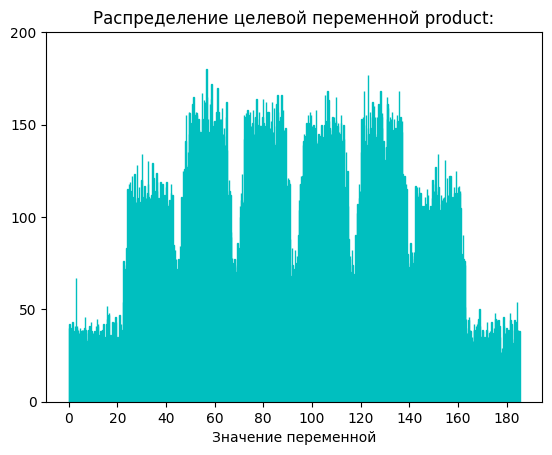

In [4]:
# Инфо о первом датасете
get_info(first_geo)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408




-----

Кол-во неявных дубликатов в столбце id: 4
Кол-во явных дубликатов: 0
Кол-во пропусков:
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

-----

<class 'pandas.core.frame.DataFrame'>
Index: 99992 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99992 non-null  object 
 1   f0       99992 non-null  float64
 2   f1       99992 non-null  float64
 3   f2       99992 non-null  float64
 4   product  99992 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


None

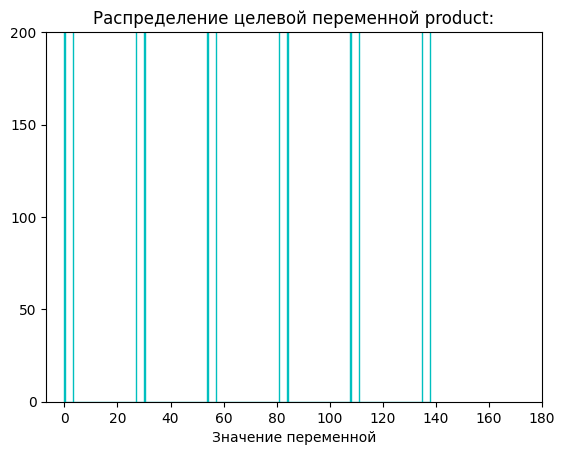

In [5]:
# Инфо о втором датасете
get_info(second_geo)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838




-----

Кол-во неявных дубликатов в столбце id: 4
Кол-во явных дубликатов: 0
Кол-во пропусков:
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

-----

<class 'pandas.core.frame.DataFrame'>
Index: 99992 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99992 non-null  object 
 1   f0       99992 non-null  float64
 2   f1       99992 non-null  float64
 3   f2       99992 non-null  float64
 4   product  99992 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


None

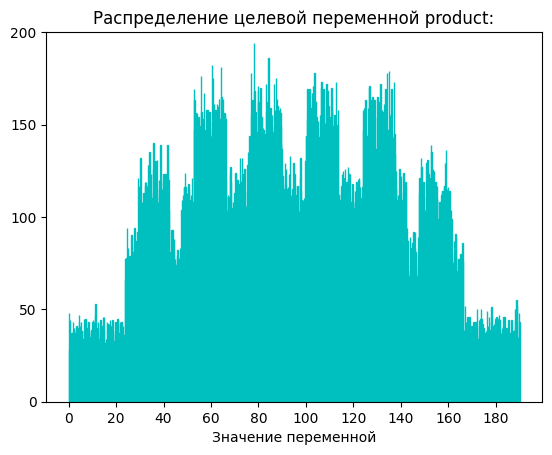

In [6]:
# Инфо о третьем датасете
get_info(third_geo)

---
**Вывод по изучению общей информации:**
- Данные в порядке и готовы к дальнейшей работе
- Пропущенных значений не обнаружено
- Явные дубликаты не обнаружены
- Убраны неявные дубликаты из столбца `[id]`:
    - 20 строк из `first_geo`
    - 8 строк из `second_geo`
    - 8 строки из `third_geo`
- Типы данных - в порядке
- Наблюдается сильная зависимость между признаками `f2` и `product`. Стоит разобраться в качестве предоставленных данных
- Распределение целевой переменной `product` во втором регионе очень сомнительно. 


---

### Подготовка данных для обучения модели

In [7]:
# Индексируем выборки
first_geo = first_geo.set_index('id')
second_geo = second_geo.set_index('id')
third_geo = third_geo.set_index('id')

# Избавляемся от целевого признака
features_first_geo = first_geo.drop('product', axis=1)
features_second_geo = second_geo.drop('product', axis=1)
features_third_geo = third_geo.drop('product', axis=1)

# Выделяем целевые признаки
target_first_geo = first_geo['product']
target_second_geo = second_geo['product']
target_third_geo = third_geo['product']

## Обучение и проверка модели

### Обучение модели `LinearRegression`

---
- Поскольку мы имеем три схожих датасэта, думаю, имеет смысл написать **единую функцию** для обучения моделей
- Пользуяюсь условием: для обучения модели подходит только `LinearRegression` (остальные — недостаточно предсказуемые)
- Не забудем применить **стандартизацию** для количественных переменных для каждой разделенной выборки
- За ключевую метрику для регрессионной модели возьмем `RMSE`, которая точнее остальных покажет фактическое отклонение от реальных значений

---

In [8]:
# Функция для обучения модели
def machine_learning(features, target, region): 
    
    """
    Функция убирает лишний столбец из нецелевых признаков, разделяет загруженный набор данных на обучающую и валидационные выборки в 
    соотношении 75:25, применяет стандартизацию для всех выборок по количественным признакам, обучает модель линейной регрессии,
    записывает предсказания модели, выводит на экран средний запас сырья в определенном регионе и среднюю квадратичную ошибку модели.
    
    ----------
    PARAMETERS
    ----------
    features: Pandas Dataframe
        Изначальный набор нецелевых признаков (региона).
    target: Pandas Series
        Набор целевых признаков (региона)
    region: str
        Название региона
        
    -------
    RETURNS
    -------
    - Предсказания модели: pd.Series
    - Правильные ответы модели (target): pd.Series
    - Датафрейм с предсказаниями и правильным ответами модели: pd.DataFrame
    """
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features,
        target,
        random_state=12345,
        test_size=0.25,
    )
    scaler = StandardScaler()
    numerics = ['f0', 'f1', 'f2']
    features_train[numerics] = scaler.fit_transform(features_train[numerics])
    features_valid[numerics] = scaler.transform(features_valid[numerics])
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted = model.predict(features_valid)
    
    print(f'Средний запас сырья в {region}:', predicted.mean())
    print('RMSE модели:', mean_squared_error(target_valid, predicted, squared=False))
    print('------')
    
    df = pd.DataFrame([], columns=['correct', 'predicted'])
    df['correct'] = target_valid
    df['predicted'] = predicted
    
    return pd.Series(predicted), pd.Series(target_valid), df


In [9]:
# Обучаем модели и сохраняем результаты
predicted_first_geo, correct_first_geo, df_first_geo = machine_learning(features_first_geo, target_first_geo, 'first_region')
predicted_second_geo, correct_second_geo, df_second_geo = machine_learning(features_second_geo, target_second_geo, 'second_region')
predicted_third_geo, correct_third_geo, df_third_geo = machine_learning(features_third_geo, target_third_geo, 'third_region')

# Сохраняем индексацию предсказанных и реальных значений
predicted_first_geo.index = correct_first_geo.index
predicted_second_geo.index = correct_second_geo.index
predicted_third_geo.index = correct_third_geo.index

Средний запас сырья в first_region: 92.59256778438035
RMSE модели: 37.5794217150813
------
Средний запас сырья в second_region: 68.728546895446
RMSE модели: 0.8930992867756167
------
Средний запас сырья в third_region: 94.96504596800489
RMSE модели: 40.02970873393434
------


In [10]:
display(predicted_first_geo.shape)
display(correct_first_geo.shape)
display(df_first_geo.head())

(25000,)

(25000,)

,correct,predicted
id,,
7Z2gx,10.038645,95.894952
b2HU8,114.551489,77.572583
Y0dXD,132.603635,77.892640
Mje59,169.072125,90.175134
yqXxU,122.325180,70.510088


---
**Выводы по обучению модели:**
- Лучше всех себя показала  модель в предсказаниях *на втором регионе*: `RMSE = 0.893099286775617`!
- Самое крупное значение среднего запаса сырья, однако же - *в третьем регионе*: `94.96504596800489`

---

## Подготовка к расчёту прибыли

In [11]:
# Зададим константы для основных значений
TOTAL_BUDGET = 10000000000
SELECTING_WELLS_COUNT = 500
BEST_WELLS_COUNT = 200
INCOME_FROM_ONE_UNIT = 450000

In [12]:
NEEDED_VOLUME = TOTAL_BUDGET / BEST_WELLS_COUNT / INCOME_FROM_ONE_UNIT
print(f'Необходимое кол-во единиц продукта для безубыточности: {NEEDED_VOLUME}')

Необходимое кол-во единиц продукта для безубыточности: 111.11111111111111


In [13]:
# Создадим функцию для расчета прибыли
def revenue_count(target_sample, probabilities_sample, INCOME_FROM_ONE_UNIT, TOTAL_BUDGET):
    """
    Функция считает прибыль с отобранных лучших 200х скважин.

    ----------
    PARAMETERS
    ----------
    target_sample: Pandas Series
        Выборка таргета из 500 скважин
    probabilities_sample: Pandas Series
        Соответствующие target_sample по индексу предсказанные ответы модели
    INCOME_FROM_ONE_UNIT: int
        Доход с единицы продукта.
    TOTAL_BUDGET: int
        Общий бюджет;
        
    -------
    RETURNS
    -------
    - Прибыль с отобранных скважин: int
    """
    probs_200_best = probabilities_sample.sort_values(ascending=False).head(200)
    selected = target_sample[probs_200_best.index]
    return selected.sum() * INCOME_FROM_ONE_UNIT - TOTAL_BUDGET

---
**Вывод по подготовке к расчету прибыли:**
- Задали основные константы для выполнения условий исследования
- Необходимое кол-во единиц продукта для безубыточности: `111.11111111111111`
- На данный момент, самое крупное предсказанное значение среднего запас сырья (в третьем регионе) - `94.96504596800489` - не дотягивает до безубыточного производства. В том числе и первый, и второй регион не приближаются по значению среднего запаса сырья к расчитанному безубыточному значению. Это рискованно, в связи с чем переходим к следующему этапу
- Создали функцию для подсчета прибыли в лучших отобранных скважинах
---

## Расчёт прибыли и рисков 

In [14]:
# Bootstrap
def bootstrap(target, probabilities, INCOME_FROM_ONE_UNIT, TOTAL_BUDGET, region):
    state = np.random.RandomState(12345)
    values = []
     
    for i in range(1000):
        target_subsample = target.sample(n=SELECTING_WELLS_COUNT, replace=True, random_state=state)
        probs_subsample = probabilities[target_subsample.index]
        profit = revenue_count(target_subsample, probs_subsample, INCOME_FROM_ONE_UNIT, TOTAL_BUDGET)
        values.append(profit)
        
    values = pd.Series(values)
    mean_profit = values.mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    
    print(f'ДЛЯ РЕГИОНА {region.upper()}:')
    print('Средняя прибыль:', mean_profit / 1000000, 'млн')
    print('Нижняя граница:', lower / 1000000, 'млн')
    print('Верхняя граница:', upper/ 1000000, 'млн')
    print(f'Риск убытка: {(len(values[values < 0]) / len(values)):.2%}')
    print('---')

In [15]:
bootstrap(correct_first_geo, predicted_first_geo, INCOME_FROM_ONE_UNIT, TOTAL_BUDGET, 'first_region')
bootstrap(correct_second_geo, predicted_second_geo, INCOME_FROM_ONE_UNIT, TOTAL_BUDGET, 'second_region')
bootstrap(correct_third_geo, predicted_third_geo, INCOME_FROM_ONE_UNIT, TOTAL_BUDGET, 'third_region')

ДЛЯ РЕГИОНА FIRST_REGION:
Средняя прибыль: 600.7352442611652 млн
Нижняя граница: 12.948331135115241 млн
Верхняя граница: 1231.1636057914982 млн
Риск убытка: 2.00%
---
ДЛЯ РЕГИОНА SECOND_REGION:
Средняя прибыль: 665.2410582210723 млн
Нижняя граница: 157.98848131991573 млн
Верхняя граница: 1197.641587463152 млн
Риск убытка: 0.30%
---
ДЛЯ РЕГИОНА THIRD_REGION:
Средняя прибыль: 615.5597228409678 млн
Нижняя граница: -12.218495237293952 млн
Верхняя граница: 1230.644473941316 млн
Риск убытка: 3.00%
---


---
**Выводы по окончательному расчету прибыли и рисков:**

`Предлагаю выбрать регион номер 2`:
- Маленький риск убытков - **0.3%** *(< 2.5% по условию заказчика)*
- Самая высокая средняя прибыль **~665 млн**

---

## Общий вывод по исследованию

---
**В результате исследования была построена модель машинного обучения, способная определить регион, где добыча принесет наибольшую прибыль. В ходе анализа рисков и прибыли при помощи метода `Bootstrap` были сделаны следующие выводы:**

- Рекомендация по выбору региона - **`регион номер 2`**
- В нем предсказан маленький **`риск убытков - 0.3%%`** *(VS 2% в первом регионе и 3% в третьем регионе)*
- Регион может в среднем принести **`~665 млн прибыли`** *(VS 600 млн в первом регионе и 615 млн в третьем регионе)*
---

*Исследование было разделено на несколько этапов:*

**1. Загрузка и подготовка данных:**
- ***Изучение общей информации***
    - Импортировали нужные библиотеки и загрузили 3 датасэта: `first_geo`, `second_geo` и `third_geo`
    - Написали функцию `get_info` для получения общей информации о данных
    - Определили, что данные в порядке и готовы к дальнейшей работе
    - Пропущенные значения и явные дубликаты в данных не были обнаружены
    - Убраны неявные дубликаты из столбца `[id]`:
        - 20 строк из `first_geo`
        - 8 строк из `second_geo`
        - 8 строки из `third_geo`
    - Типы данных - тоже в порядке
    - Наблюдали сильную зависимость между признаками `f2` и `product`. Стоит разобраться в качестве предоставленных данных
    
    
- ***Подготовка данных для обучение модели:***
    - Выделили нецелевые и целевой признаки в данных
    - Проиндексировали выборки



**2. Обучение и проверка модели**
- ***Написали функцию для обучения модели `LinearRegression`, которая:***
    - убирает лишний столбец из нецелевых признаков 
    - разделяет загруженный набор данных на обучающую и валидационные выборки в соотношении 75:25
    - применяет стандартизацию для всех выборок по количественным признакам
    - обучает модель линейной регрессии
    - записывает предсказания модели 
    - выводит на экран средний запас сырья в определенном регионе и среднюю квадратичную ошибку (RMSE) модели
- Лучше всех себя показала модель в предсказаниях на втором регионе: **`RMSE`** - `0.8902801001028846`
- Самое **крупное значение среднего запаса сырья** - в третьем регионе: `94.96504596800489`

**3. Подготовка к расчету прибыли**
- Задали основные константы для выполнения условий исследования
- *Необходимое кол-во единиц продукта для безубыточности: `111.11111111111111`*
- На данный момент, самое крупное предсказанное значение среднего запас сырья (в третьем регионе) - **94.96504596800489 - не дотягивает до безубыточного производства**. В том числе и первый, и второй регион не приближаются по значению среднего запаса сырья к расчитанному безубыточному значению, что рискованно. 
- Создали функцию `revenue_count` для подсчета прибыли в лучших отобранных скважинах

**4. Расчет прибыли и рисков**
- Применили метод `Bootstrap`:
    - 1000 раз создали выборки из 500 скважин и посчитали необходимые метрики
- **Лучшим приняли для рекомендации `второй регион`, его показатели:**
    - Средняя прибыль: 665.2410582210723 млн
    - Нижняя граница: 157.98848131991573 млн
    - Верхняя граница: 1197.641587463152 млн
    - Риск убытка: **0.30%**

---